In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

In [2]:
# Importing the MNIST dataset
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

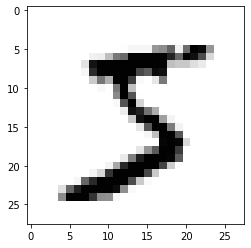

In [5]:
# Sampling first image visually
first_image = x_train[0]
plt.imshow(first_image, cmap='Greys')
plt.show()

In [61]:
print('Actual image:')
print(y_train[0])

Actual image:
5


In [8]:
y_train.shape

(60000,)

**Note:** The targets in y_train and y_test are simply numerical values. We need to perform one-hot encoding for our model as this is a multi-class classification problem.

In [12]:
from tensorflow.keras.utils import to_categorical
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [13]:
first_image.max()

255

In [14]:
first_image.min()

0

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

**Note:** We can simply divide the training and test data by the maximum value of 255 to scale the data.

In [17]:
# Scaling values on train and test data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

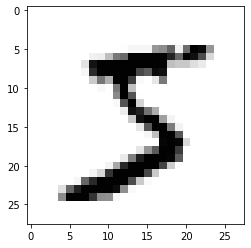

In [18]:
# Rechecking image after scaling
plt.imshow(x_train_scaled[0], cmap='Greys')
plt.show()

In [19]:
# Reshaping final training and testing data to prep for training
# (batch_size, width, height, color_channels)
x_train_final = x_train_scaled.reshape(60000,28,28,1)
x_test_final = x_test_scaled.reshape(10000,28,28,1)

# Building the CNN Model
- This models consists of only one convolution layer followed by a pooling layer to speed up computation while still retaining the meaningful information of the data.
- The image was flattened and then fed into a dense layer followed by the output layer.
- A softmax activation function was used for the output layer as this is a multi-class classification problem.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [21]:
# Building CNN Model

# Instantiate model
model = Sequential()

# Convolution layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), input_shape=(28,28,1), activation='relu'))
# Pooling layer (selected half of kernel_size)
model.add(MaxPool2D(pool_size=(2,2)))

# Flattening image
model.add(Flatten())
# Dense layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [24]:
model.fit(x_train_final, y_cat_train, epochs=10, validation_data=(x_test_final, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 217us/sample - loss: 0.1402 - accuracy: 0.9582 - val_loss: 0.0539 - val_accuracy: 0.9822
Epoch 2/10
60000/60000 [==============================] - 13s 222us/sample - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0421 - val_accuracy: 0.9870
Epoch 3/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0372 - val_accuracy: 0.9875
Epoch 4/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0376 - val_accuracy: 0.9885
Epoch 5/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0141 - accuracy: 0.9951 - val_loss: 0.0399 - val_accuracy: 0.9878


# Model Evaluation
- The loss of the training and validation sets were plotted to ensure we are not overfitting our model
- Accuracy of the training and validation data were also plotted
- Overall accuracy was obtained from a classification report and confusion matrix

In [25]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140225,0.958150,0.053934,0.9822
1,0.049036,0.985283,0.042118,0.9870
2,0.031948,0.989817,0.037213,0.9875
3,0.021565,0.993067,0.037632,0.9885
4,0.014133,0.995117,0.039918,0.9878


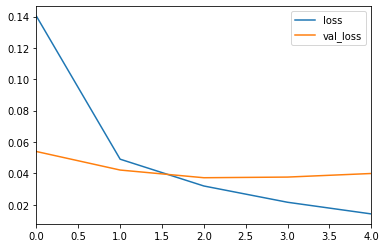

In [26]:
metrics[['loss', 'val_loss']].plot()
plt.show()

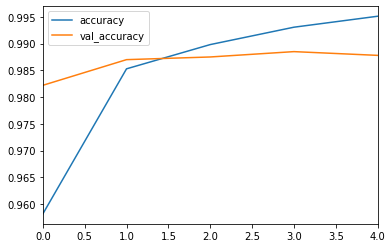

In [27]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.show()

In [29]:
model.evaluate(x_test_final, y_cat_test, verbose=0)

[0.039918137207131804, 0.9878]

In [60]:
y_pred = model.predict_classes(x_test_final)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Confusion Matrix:
[[ 976    0    1    1    0    1    0    0    1    0]
 [   0 1131    2    0    0    0    2    0    0    0]
 [   1    3 1023    0    0    0    1    3    1    0]
 [   0    0    4 1000    0    5    0   

Our model performs quite well based on the above evaluation, resulting in an overall accuracy of 99%.

# Sample Predictions
- Random samples from the testing set were selected and our model was used to predict each sample target.
- The actual image is displayed followed by the prediction.

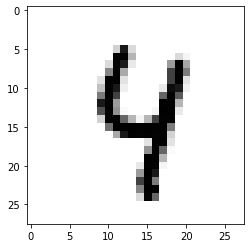

In [51]:
np.random.seed(19)
random_selection = np.random.randint(0, 10000, size=1)
random_sample = x_test_final[random_selection]
plt.imshow(random_sample.reshape(28,28), cmap='Greys')
plt.show()

In [52]:
print('Prediction:')
print(model.predict_classes(random_sample.reshape(1,28,28,1))[0])

Prediction:
4


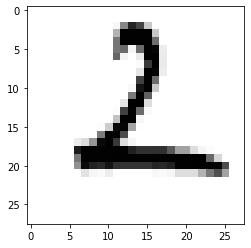

In [55]:
np.random.seed(20)
random_selection_2 = np.random.randint(0, 10000, size=1)
random_sample_2 = x_test_final[random_selection_2]
plt.imshow(random_sample_2.reshape(28,28), cmap='Greys')
plt.show()

In [56]:
print('Prediction:')
print(model.predict_classes(random_sample_2.reshape(1,28,28,1))[0])

Prediction:
2


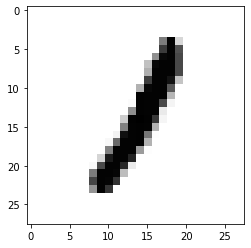

In [57]:
np.random.seed(21)
random_selection_3 = np.random.randint(0, 10000, size=1)
random_sample_3 = x_test_final[random_selection_3]
plt.imshow(random_sample_3.reshape(28,28), cmap='Greys')
plt.show()

In [58]:
print('Prediction:')
print(model.predict_classes(random_sample_3.reshape(1,28,28,1))[0])

Prediction:
1
